## Schritt 1: Alle Excel-Dateien in Ordner öffnen

In [7]:
import os
import pandas as pd

In [8]:
files = os.listdir("../data/excel-projekt")
excel_files = [file for file in files if file[-5:] == ".xlsx"]

In [9]:
dfs = {}

for file in excel_files:
    dfs[file] = pd.read_excel("../data/excel-projekt/" + file)

In [10]:
dfs["Marie.xlsx"]

,Datum,Anzahl an Anrufen,Anzahl an Verkäufen
0,2018-04-05,40,15
1,2018-04-06,49,14
2,2018-04-09,38,17
3,2018-04-10,49,10
4,2018-04-12,40,15
5,2018-04-13,60,30


In [11]:
dfs["Tobias.xlsx"]

,Datum,Anzahl an Anrufen,Anzahl an Verkäufen
0,2018-04-05,41,15
1,2018-04-06,49,14
2,2018-04-09,42,18
3,2018-04-10,38,13
4,2018-04-11,55,12
5,2018-04-12,49,12
6,2018-04-13,45,14


### Schritt 2: Alle Dateien in ein gemeinsames Dictionary zusammenführen

In [12]:
d = {}

In [13]:
df = dfs["Tobias.xlsx"]

In [14]:
for index, row in df.iterrows():
    date_col = row["Datum"].date()
    d[date_col] = {}
    d[date_col]["Tobias.xlsx"] = {
        "calls": row["Anzahl an Anrufen"],
        "sales": row["Anzahl an Verkäufen"]
    }
    
print(d)

{datetime.date(2018, 4, 5): {'Tobias.xlsx': {'calls': 41, 'sales': 15}}, datetime.date(2018, 4, 6): {'Tobias.xlsx': {'calls': 49, 'sales': 14}}, datetime.date(2018, 4, 9): {'Tobias.xlsx': {'calls': 42, 'sales': 18}}, datetime.date(2018, 4, 10): {'Tobias.xlsx': {'calls': 38, 'sales': 13}}, datetime.date(2018, 4, 11): {'Tobias.xlsx': {'calls': 55, 'sales': 12}}, datetime.date(2018, 4, 12): {'Tobias.xlsx': {'calls': 49, 'sales': 12}}, datetime.date(2018, 4, 13): {'Tobias.xlsx': {'calls': 45, 'sales': 14}}}


In [15]:
from datetime import date

d = {}
for filename, df in dfs.items():
    for index, row in df.iterrows():
        date_col = row["Datum"].date()
        if not date_col in d:
            d[date_col] = {}
        
        d[date_col][filename] = {
            "calls": row["Anzahl an Anrufen"],
            "sales": row["Anzahl an Verkäufen"]
        }
    #print(d[date(year=2018, month=4, day=5)])
    
print(d)

{datetime.date(2018, 4, 5): {'Eva.xlsx': {'calls': 49, 'sales': 12}, 'Jan.xlsx': {'calls': 40, 'sales': 10}, 'Marie.xlsx': {'calls': 40, 'sales': 15}, 'Tobias.xlsx': {'calls': 41, 'sales': 15}}, datetime.date(2018, 4, 6): {'Eva.xlsx': {'calls': 48, 'sales': 14}, 'Jan.xlsx': {'calls': 43, 'sales': 15}, 'Marie.xlsx': {'calls': 49, 'sales': 14}, 'Tobias.xlsx': {'calls': 49, 'sales': 14}}, datetime.date(2018, 4, 9): {'Eva.xlsx': {'calls': 43, 'sales': 15}, 'Jan.xlsx': {'calls': 33, 'sales': 12}, 'Marie.xlsx': {'calls': 38, 'sales': 17}, 'Tobias.xlsx': {'calls': 42, 'sales': 18}}, datetime.date(2018, 4, 10): {'Eva.xlsx': {'calls': 47, 'sales': 18}, 'Jan.xlsx': {'calls': 43, 'sales': 10}, 'Marie.xlsx': {'calls': 49, 'sales': 10}, 'Tobias.xlsx': {'calls': 38, 'sales': 13}}, datetime.date(2018, 4, 11): {'Eva.xlsx': {'calls': 48, 'sales': 30}, 'Jan.xlsx': {'calls': 23, 'sales': 20}, 'Tobias.xlsx': {'calls': 55, 'sales': 12}}, datetime.date(2018, 4, 12): {'Eva.xlsx': {'calls': 59, 'sales': 15}, 

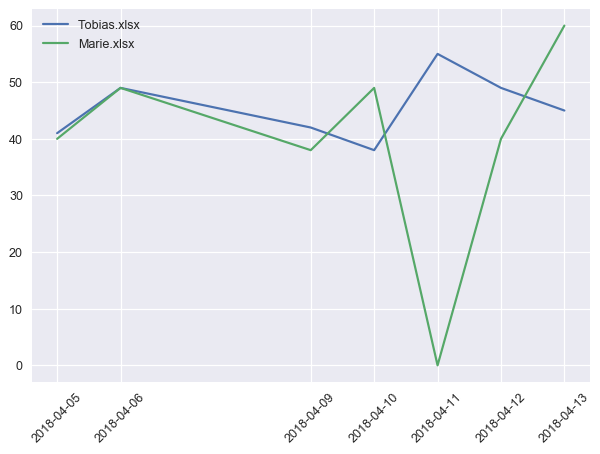

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.dpi = 90

x = [excel_date for excel_date, values in sorted(d.items())]
#x = []
#for excel_date, values in sorted(d.items()):
#    x.append(excel_date)

filenames = ["Tobias.xlsx", "Marie.xlsx"]
for filename in filenames:
    y = []
    for excel_date, values in sorted(d.items()):
        calls = 0
        if filename in values:
            calls = values[filename]['calls']
        y.append(calls)

    ax.plot(x, y, label=filename)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)

plt.show()

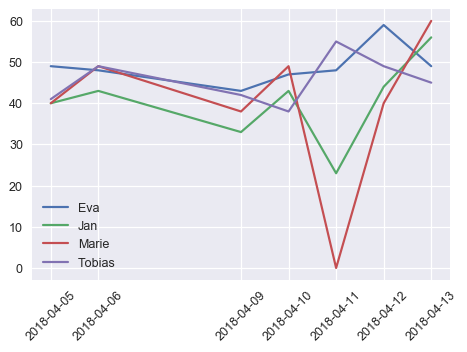

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, clear_output

cbs = {}
for filename, df in dfs.items():
    cb = widgets.Checkbox(
        value=True,
        description=filename[:-5]
    )
    cbs[filename] = cb

    display(cb)
    
type_selector = widgets.RadioButtons(
    options={
        "Anruf-Statistiken": "calls",
        "Verkaufs-Statistiken": "sales"
    },
    value="calls",
    description="Typ"
)
display(type_selector)
    
button = widgets.Button(description="Aktualisieren")
display(button)

def run_plot(filenames, t):
    fig, ax = plt.subplots()
    fig.dpi = 90

    x = [excel_date for excel_date, values in sorted(d.items())]

    for filename in filenames:
        y = []
        for excel_date, values in sorted(d.items()):
            calls = 0
            if filename in values:
                calls = values[filename][t]
            y.append(calls)

        ax.plot(x, y, label=filename[:-5])

    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)

    plt.show()
    


def on_button_click(s):
    clear_output()
        
    filenames = []
    for filename, df in dfs.items():
        if cbs[filename].value:
            filenames.append(filename)
    
    run_plot(filenames, type_selector.value)
    
button.on_click(on_button_click)
#












#